Valore teorico Black-Scholes:
Call: 14.9757907783113
Put : 5.459532581907247


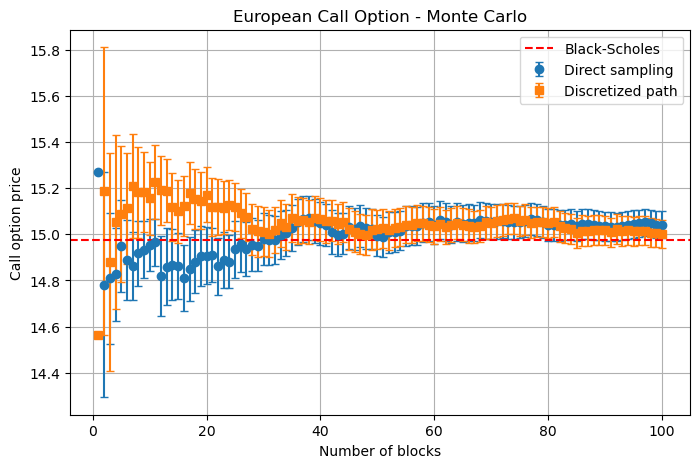

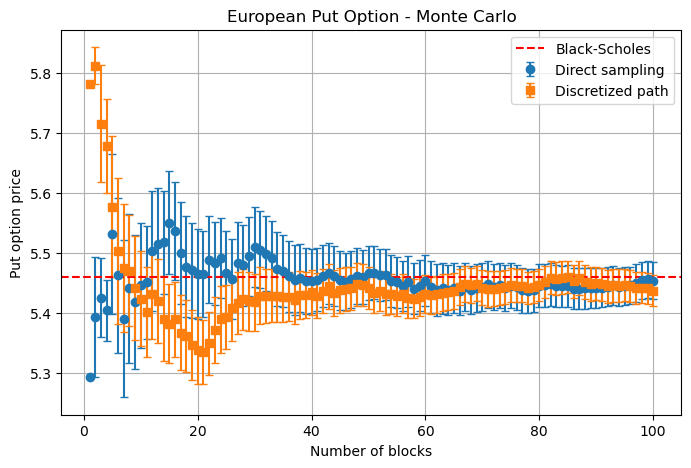

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm

# ==== Funzioni Black-Scholes (valori teorici) ====
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    return S0*norm.cdf(d1) - K*exp(-r*T)*norm.cdf(d2)

def black_scholes_put(S0, K, T, r, sigma):
    d1 = (log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    return K*exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)

# ==== Parametri (gli stessi del C++) ====
S0 = 100.0
K = 100.0
T = 1.0
r = 0.1
sigma = 0.25

call_theory = black_scholes_call(S0, K, T, r, sigma)
put_theory  = black_scholes_put(S0, K, T, r, sigma)

print("Valore teorico Black-Scholes:")
print("Call:", call_theory)
print("Put :", put_theory)

# ==== Carico i dati ====
direct = np.loadtxt("option_prices_direct.dat")
disc   = np.loadtxt("option_prices_discretized.dat")

blocks = direct[:,0]
call_direct, err_call_direct = direct[:,1], direct[:,2]
put_direct,  err_put_direct  = direct[:,3], direct[:,4]

call_disc, err_call_disc = disc[:,1], disc[:,2]
put_disc,  err_put_disc  = disc[:,3], disc[:,4]

# ==== Grafico CALL ====
plt.figure(figsize=(8,5))
plt.errorbar(blocks, call_direct, yerr=err_call_direct, fmt='o', capsize=3, label="Direct sampling")
plt.errorbar(blocks, call_disc,   yerr=err_call_disc,   fmt='s', capsize=3, label="Discretized path")
plt.axhline(call_theory, color='red', linestyle='--', label="Black-Scholes")
plt.xlabel("Number of blocks")
plt.ylabel("Call option price")
plt.title("European Call Option - Monte Carlo")
plt.legend()
plt.grid(True)
plt.show()

# ==== Grafico PUT ====
plt.figure(figsize=(8,5))
plt.errorbar(blocks, put_direct, yerr=err_put_direct, fmt='o', capsize=3, label="Direct sampling")
plt.errorbar(blocks, put_disc,   yerr=err_put_disc,   fmt='s', capsize=3, label="Discretized path")
plt.axhline(put_theory, color='red', linestyle='--', label="Black-Scholes")
plt.xlabel("Number of blocks")
plt.ylabel("Put option price")
plt.title("European Put Option - Monte Carlo")
plt.legend()
plt.grid(True)
plt.show()
